# Exploratory Data Analysis

In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/Users/chris/Desktop/anime.csv") # store csv in df

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,User_id,Anime_id,Rating,Name,Genre,Type,Episodes,Source
0,0,430,9,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ...",Movie,1,Manga
1,0,2248,6,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,"Action, Comedy, Sports, Martial Arts, Fantasy,...",Special,1,Original
2,0,1047,6,On Your Mark,"Sci-Fi, Music, Drama",Music,1,Music
3,0,459,9,One Piece Movie 1,"Action, Adventure, Comedy, Super Power, Fantas...",Movie,1,Manga
4,0,466,7,One Piece: Taose! Kaizoku Ganzack,"Action, Adventure, Fantasy, Comedy, Super Powe...",OVA,1,Manga
...,...,...,...,...,...,...,...,...
1584531,10000,2617,7,Ghiblies,Comedy,Special,2,Original
1584532,10000,6880,7,Deadman Wonderland,"Action, Horror, Sci-Fi, Shounen, Supernatural",TV,12,Manga
1584533,10000,47,10,Akira,"Action, Military, Sci-Fi, Adventure, Horror, S...",Movie,1,Manga
1584534,10000,1818,7,Claymore,"Action, Adventure, Super Power, Demons, Supern...",TV,26,Manga


In [4]:
profile = df.profile_report(title='Anime EDA Report') # generate profile.
profile.to_notebook_iframe() # show the HTML file in the notebook.

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
x = df.groupby('Type')['Rating'].mean()
x = pd.DataFrame(x)
x.reset_index(level=0, inplace=True)

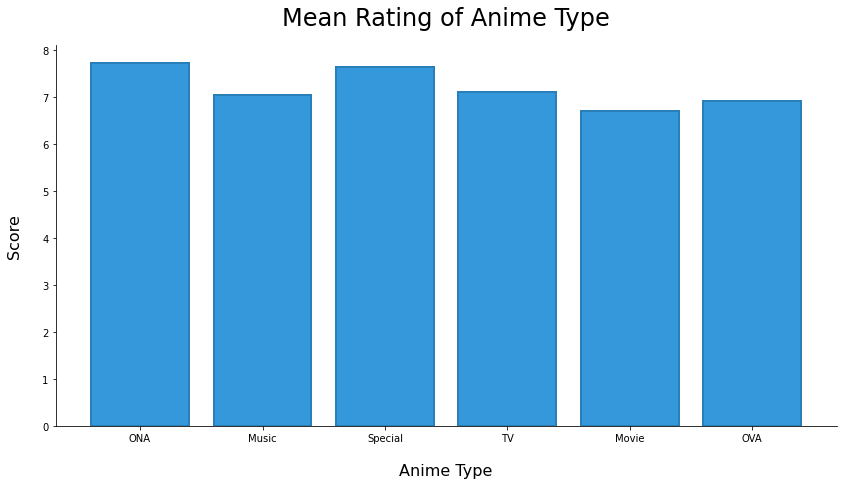

In [7]:
def make_bar_chart(dataset, xattribute, yattribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[xattribute].value_counts().index
        ys = dataset[yattribute].value_counts().index
        
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=ys, height=xs, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=0)
    
    
make_bar_chart(x, 'Rating', 'Type',title='Mean Rating of Anime Type', xlab='Anime Type', ylab='Score')

# Principal Component Analysis (PCA)

In [8]:
user_anime = pd.crosstab(df['User_id'], df['Name'])
user_anime.head(10)

Name,"""0""","""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Calpis"" Hakkou Monogatari","""Eiji""","""Eiyuu"" Kaitai","""Kinako"" Movie x Mameshiba","""Kiss Dekiru Gyoza"" x Mameshiba Movie",...,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,the FLY BanD!,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯
User_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [11]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-3.721778,0.618291,-0.019774
1,-0.685570,-3.082288,1.197110
2,-2.526772,-0.905175,0.087107
3,5.750450,0.148651,-3.993420
4,-2.786906,2.464261,0.008352


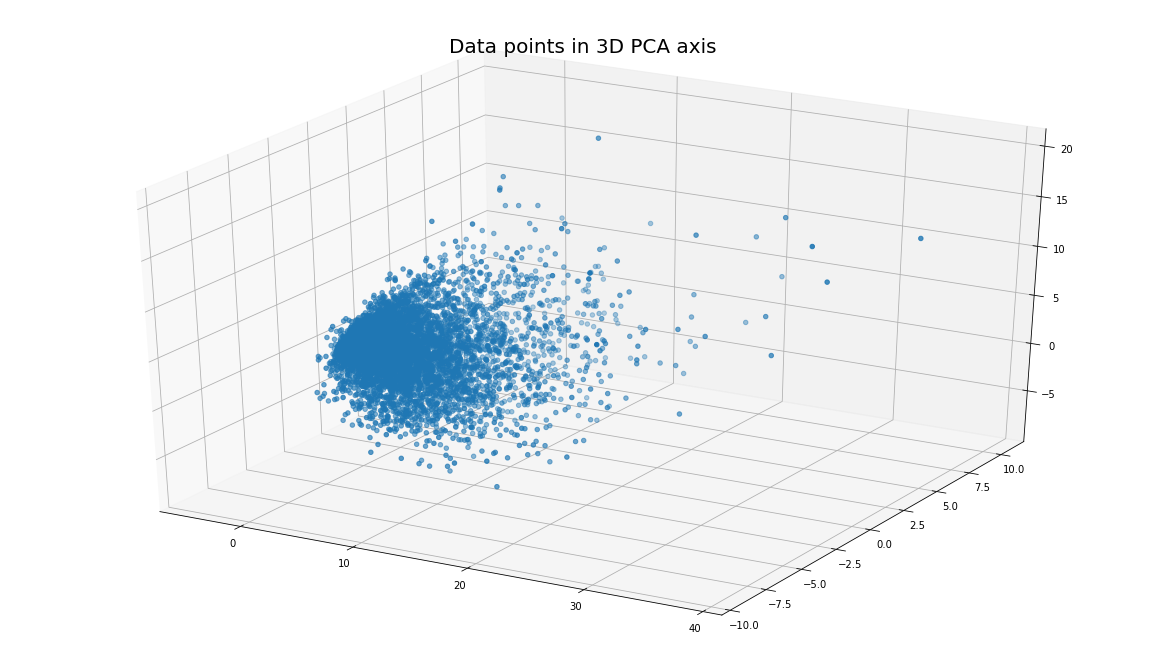

In [12]:
tocluster = pd.DataFrame(ps[[0,1,2]])

plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

# K-Means Clustering

## Select Number of K for K-Means Clustering

Text(0, 0.5, 'Distortion')

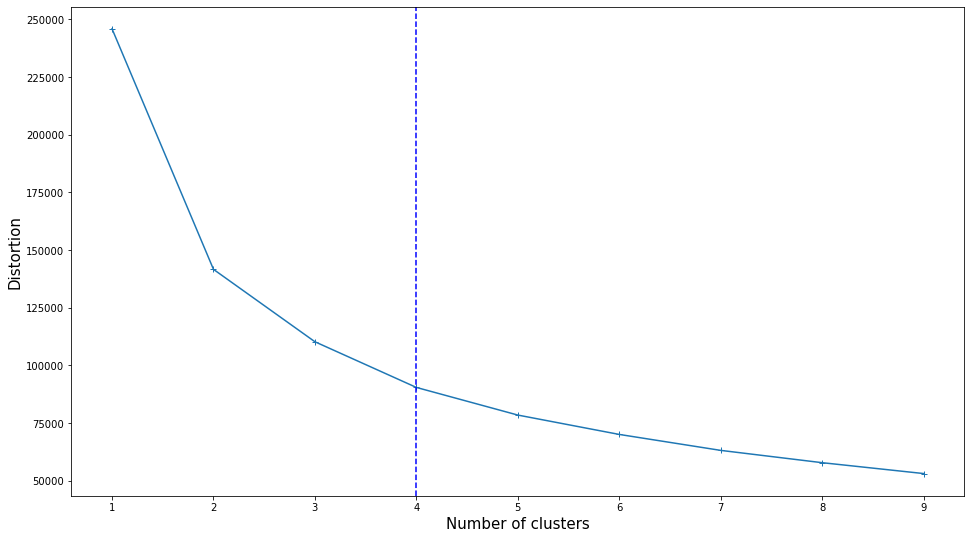

In [13]:
from sklearn.cluster import KMeans

dist_list = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='random')
    kmeans.fit(tocluster)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters', fontsize=15)
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Distortion', fontsize=15)


## Choose K=4 for K-Means Clustering

In [14]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-2.61888381  0.08956862 -0.15804091]
 [ 2.80664837 -2.36323294  0.40300386]
 [11.90347792  0.71372502 -1.43910978]
 [ 2.10743071  3.83348623  0.73962889]]


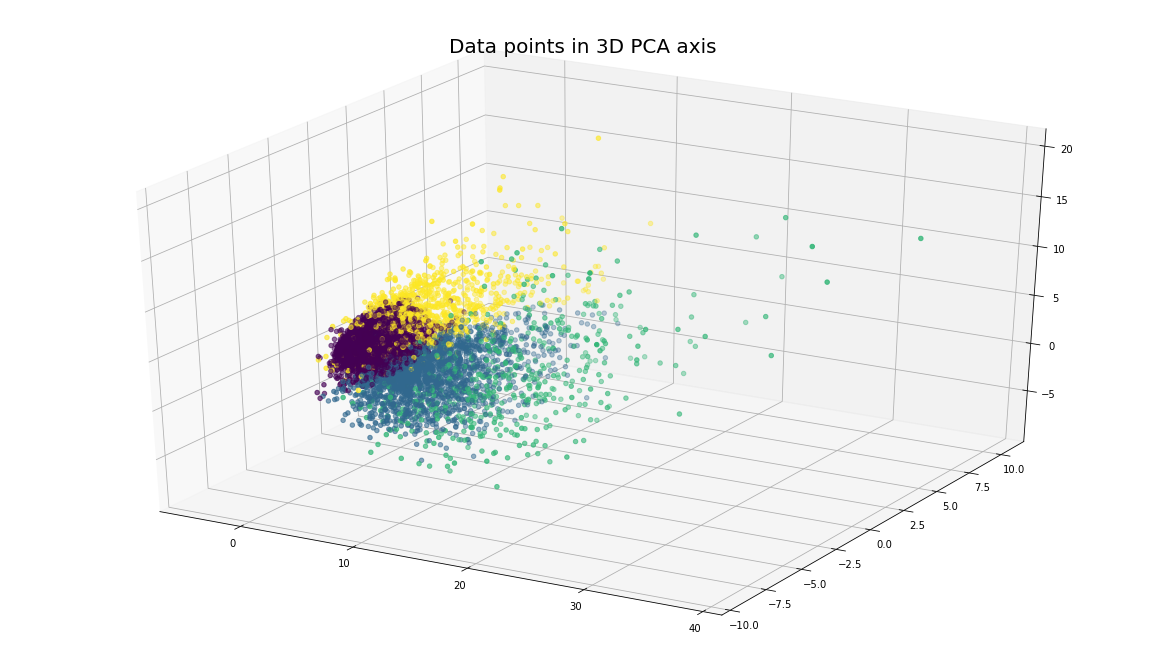

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

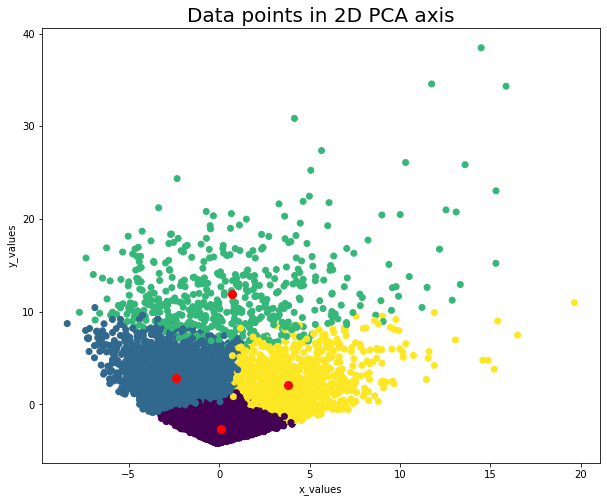

In [16]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [17]:
user_anime['cluster'] = c_preds

## Characteristics of Each Cluster

In [18]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

In [19]:
c0.sort_values(ascending=False)[0:15]

Name
Death Note                            0.471669
Shingeki no Kyojin                    0.370980
Sword Art Online                      0.334035
Sen to Chihiro no Kamikakushi         0.305130
Naruto                                0.290582
Code Geass: Hangyaku no Lelouch       0.282351
Fullmetal Alchemist: Brotherhood      0.278905
Angel Beats!                          0.268185
Toradora!                             0.261677
One Punch Man                         0.256700
Tokyo Ghoul                           0.243874
Elfen Lied                            0.243874
Kimi no Na wa.                        0.235452
Code Geass: Hangyaku no Lelouch R2    0.233538
Steins;Gate                           0.217266
dtype: float64

In [20]:
c1.sort_values(ascending=False)[0:15]

Name
Shingeki no Kyojin                        0.883358
One Punch Man                             0.859226
Sword Art Online                          0.853695
No Game No Life                           0.836099
Boku no Hero Academia                     0.822021
Kimi no Na wa.                            0.786325
Re:Zero kara Hajimeru Isekai Seikatsu     0.775264
Tokyo Ghoul                               0.768225
Kono Subarashii Sekai ni Shukufuku wo!    0.760684
Death Note                                0.746606
Boku no Hero Academia 2nd Season          0.732026
Noragami                                  0.721971
Shingeki no Kyojin Season 2               0.719457
Sword Art Online II                       0.704877
Koe no Katachi                            0.699346
dtype: float64

# Collaborative Filtering

In [21]:
# Code for collaborative filtering is referenced from: 
# "https://www.kaggle.com/ajmichelutti/collaborative-filtering-on-anime-data"

In [22]:
piv = df.pivot_table(index=['User_id'], columns=['Name'], values='Rating')
print(piv.shape)
piv.head()

(8725, 13111)


Name,"""0""","""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Calpis"" Hakkou Monogatari","""Eiji""","""Eiyuu"" Kaitai","""Kinako"" Movie x Mameshiba","""Kiss Dekiru Gyoza"" x Mameshiba Movie",...,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,the FLY BanD!,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯
User_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,9.0,NaN,NaN,8.0,NaN,NaN


In [23]:
# min-max normalization
piv_norm = piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

In [26]:
# Exclude columns containing only 0s 
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [27]:
# Anime data needs to have a sparse matrix format to be read by subsequent functions
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [28]:
# Cosine similarity values between each user/user array pair and item/item array pair.
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [29]:
# Insert the similarity matricies into dataframe objects
item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

In [31]:
# The following function returns the top 10 anime with the highest cosine similarity value
def top_animes(anime_name):
    count = 1
    print('Similar shows to {} include:\n'.format(anime_name))
    for item in item_sim_df.sort_values(by = anime_name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count +=1  

In [32]:
# The following function returns the top 5 commnunity users with the highest similarity value
def top_users(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 

In [33]:
# The following function creates list of lists containing the best-performing anime per similar user
# and returns the its name along with the frequency it appears in the list

def similar_user_recs(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]    

In [34]:
# The following function calculates the weighted average of similar users to determine a potential rating for an input user and anime

def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)    

In [35]:
top_animes('One Punch Man')

Similar shows to One Punch Man include:

No. 1: Mob Psycho 100
No. 2: Mob Psycho 100 II
No. 3: Hunter x Hunter (2011)
No. 4: Fullmetal Alchemist: Brotherhood
No. 5: Steins;Gate
No. 6: Kimi no Na wa.
No. 7: Boku no Hero Academia 2nd Season
No. 8: Shokugeki no Souma
No. 9: Koe no Katachi
No. 10: Boku no Hero Academia


In [36]:
top_users(3)

Most Similar Users:

User #8314, Similarity value: 0.27
User #321, Similarity value: 0.26
User #5658, Similarity value: 0.26
User #469, Similarity value: 0.24
User #5653, Similarity value: 0.24
User #5049, Similarity value: 0.24
User #776, Similarity value: 0.23
User #9479, Similarity value: 0.23
User #7865, Similarity value: 0.23
User #8501, Similarity value: 0.22


In [37]:
similar_user_recs(3)

[('Steins;Gate', 9),
 ('Fullmetal Alchemist: Brotherhood', 8),
 ('Kimi no Na wa.', 7),
 ('Code Geass: Hangyaku no Lelouch R2', 5),
 ('Monogatari Series: Second Season', 5)]

In [38]:
predicted_rating('One Punch Man', 3)

8.678152966536109

In [39]:
# Below we'll see how the predict_rating function performs compared to the observed rated values for user 3.
watched = piv.T[piv.loc[3,:]>0].index.tolist()

In [40]:
# Make a list of the squared errors between actual and predicted value
errors = []
for i in watched:
    actual=piv.loc[3, i]
    predicted = predicted_rating(i, 3)
    errors.append((actual-predicted)**2)

In [41]:
# This is the average squared error for user 3
np.mean(errors)

0.38898160836617846

# Content-based Filtering

In [42]:
piv = df.pivot_table(index='User_id', columns='Name', values='Rating')

In [43]:
piv.head()

Name,"""0""","""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Calpis"" Hakkou Monogatari","""Eiji""","""Eiyuu"" Kaitai","""Kinako"" Movie x Mameshiba","""Kiss Dekiru Gyoza"" x Mameshiba Movie",...,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,the FLY BanD!,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯
User_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,9.0,NaN,NaN,8.0,NaN,NaN


In [46]:
def get_similar_animes(anime_title, n_recommendations=4):
    similar = piv.corrwith(piv[anime_title]) # (1)
    corr_similar = pd.DataFrame(similar, columns=['correlation']) # (2)
    corr_similar.dropna(inplace=True)
    
    orig = df.copy()
    
    corr_with_anime = pd.merge( # (3), this is an inner join
        left=corr_similar, 
        right=orig, 
        on='Name')[['Name', 'correlation', 'Rating']].drop_duplicates().reset_index(drop=True)
    # (4) & (5):
    result = corr_with_anime.sort_values(by='correlation', ascending=False)
    
    return result.head(n_recommendations) # (6)

In [47]:
get_similar_animes('One Punch Man')

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/chris/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Name,correlation,Rating
1352,Agukaru,1.0,7
49295,Pyuu to Fuku! Jaguar,1.0,2
39946,Miyako,1.0,4
11808,Da Yu Hai Tang,1.0,8


# Alternating Least Squares (ALS) Model

In [ ]:
# Code for the ALS model is referenced from:
# "https://github.com/snehalnair/als-recommender-pyspark"

In [2]:
# find spark  
import findspark
findspark.init("/Users/chris/spark-3.1.1-bin-hadoop2.7")

# import pyspark
import pyspark

sc = pyspark.SparkContext.getOrCreate()
print(sc)

spark = pyspark.sql.SparkSession.builder.getOrCreate()
print(spark)

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

from pyspark.sql.functions import col, explode
from pyspark import SparkContext

<SparkContext master=local[*] appName=pyspark-shell>


In [3]:
anime = spark.read.csv("/Users/chris/Desktop/anime.csv",header=True)
anime.show()

+-------+--------+------+--------------------+--------------------+-------+--------+------------+
|User_id|Anime_id|Rating|                Name|               Genre|   Type|Episodes|      Source|
+-------+--------+------+--------------------+--------------------+-------+--------+------------+
|      0|     430|     9|Fullmetal Alchemi...|Military, Comedy,...|  Movie|       1|       Manga|
|      0|    2248|     6|Naruto: Dai Katsu...|Action, Comedy, S...|Special|       1|    Original|
|      0|    1047|     6|        On Your Mark|Sci-Fi, Music, Drama|  Music|       1|       Music|
|      0|     459|     9|   One Piece Movie 1|Action, Adventure...|  Movie|       1|       Manga|
|      0|     466|     7|One Piece: Taose!...|Action, Adventure...|    OVA|       1|       Manga|
|      0|    2543|     7|Robin Hood no Dai...|Adventure, Histor...|     TV|      52|     Unknown|
|      0|     174|     4|        Tenjou Tenge|Action, Ecchi, Ma...|     TV|      24|       Manga|
|      0|     199|  

In [4]:
# Change column name
anime = anime.withColumnRenamed('User_id', 'Userid')

In [5]:
# Schema
anime.printSchema()

root
 |-- Userid: string (nullable = true)
 |-- Anime_id: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Episodes: string (nullable = true)
 |-- Source: string (nullable = true)



In [6]:
# Casting data types
anime = anime.\
    withColumn('Userid', col('Userid').cast('integer')).\
    withColumn('Anime_id', col('Anime_id').cast('integer')).\
    withColumn('Rating', col('Rating').cast('float')).\
    drop('Episodes','Name','Genre','Type','Source')
anime.show()

+------+--------+------+
|Userid|Anime_id|Rating|
+------+--------+------+
|     0|     430|   9.0|
|     0|    2248|   6.0|
|     0|    1047|   6.0|
|     0|     459|   9.0|
|     0|     466|   7.0|
|     0|    2543|   7.0|
|     0|     174|   4.0|
|     0|     199|   8.0|
|     0|     169|   7.0|
|     0|    2547|   7.0|
|     0|    2034|   8.0|
|     0|     448|   5.0|
|     0|    2236|  10.0|
|     0|     415|  10.0|
|     0|    1894|   7.0|
|     0|     164|   8.0|
|     0|    3418|   9.0|
|     0|     600|   6.0|
|     0|    3010|   7.0|
|     0|     570|   7.0|
+------+--------+------+
only showing top 20 rows



In [7]:
# Calculate sparsity:
# Count the total number of ratings in the dataset
numerator = anime.select("Rating").count()

# Count the number of distinct userIds and distinct movieIds
num_users = anime.select("Userid").distinct().count()
num_movies = anime.select("Anime_id").distinct().count()

# Set the denominator equal to the number of users multiplied by the number of movies
denominator = num_users * num_movies

# Divide the numerator by the denominator
sparsity = (1.0 - (numerator *1.0)/denominator)*100
print("The ratings dataframe is ", "%.2f" % sparsity + "% empty.")

The ratings dataframe is  98.62% empty.


In [8]:
# Import relevant libraries and pkgs for machine learning
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [9]:
# Separate training and test sets, set seed
(train, test) = anime.randomSplit([0.8, 0.2], seed = 1234)

# Formation of the ALS model
als = ALS(userCol="Userid", itemCol="Anime_id", ratingCol="Rating", nonnegative = True, implicitPrefs = False, 
          coldStartStrategy="drop")

# Confirm the creation of the ALS model
print(type(als))

# Fit the ALS model on training set
model =als.fit(train)

# Validate with the test set
test_predictions = model.transform(test)

<class 'pyspark.ml.recommendation.ALS'>


In [10]:
# Define evaluator as RMSE and print length of evaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="Rating", predictionCol="prediction") 

In [11]:
# Fit the ALS model on training set
model =als.fit(train)

# View the predictions
test_predictions = model.transform(test)
RMSE = evaluator.evaluate(test_predictions)
print(RMSE)

test_predictions.show()

1.1785895241148945
+------+--------+------+----------+
|Userid|Anime_id|Rating|prediction|
+------+--------+------+----------+
|  9012|     148|   9.0|  6.871259|
|  4382|     148|   5.0|  6.374996|
|  2674|     148|   7.0|  6.987035|
|  9211|     148|   7.0|  6.958023|
|  9440|     148|   8.0| 7.4905677|
|   147|     148|  10.0|  8.408899|
|  5152|     463|   7.0|  7.161813|
|  9926|     463|   7.0| 5.7649007|
|  2355|     463|   8.0|  7.760541|
|  9700|     463|   8.0|   7.47382|
|  7732|     463|   9.0|  7.175571|
|  7788|     463|   7.0|  6.719078|
|  4610|     463|   8.0| 7.7738295|
|  3621|     463|   8.0|   8.44029|
|  1820|     463|   7.0| 6.9180713|
|  4989|     463|   6.0| 6.0115585|
|  1824|     463|   9.0|  7.950046|
|   128|     463|   6.0|  6.933142|
|  7683|     463|   8.0|  6.832399|
|  2638|     463|   5.0| 5.5290976|
+------+--------+------+----------+
only showing top 20 rows



In [12]:
# Generate n Recommendations for all users
nrecommendations = model.recommendForAllUsers(10)
nrecommendations.limit(10).show()

+------+--------------------+
|Userid|     recommendations|
+------+--------------------+
|  1580|[{38852, 10.00978...|
|  4900|[{38852, 10.68429...|
|  6620|[{38852, 9.817439...|
|  7240|[{38852, 9.95397}...|
|  7340|[{38852, 11.12031...|
|  9900|[{820, 10.525155}...|
|  1591|[{38852, 10.85130...|
|  4101|[{42104, 11.45819...|
|  1342|[{38852, 11.17742...|
|  2122|[{820, 8.768755},...|
+------+--------------------+



In [13]:
nrecommendations = nrecommendations\
    .withColumn("rec_exp", explode("recommendations"))\
    .select('Userid', col("rec_exp.Anime_id"), col("rec_exp.Rating"))

nrecommendations.limit(10).show()

+------+--------+---------+
|Userid|Anime_id|   Rating|
+------+--------+---------+
|  1580|   38852|10.009788|
|  1580|    6658| 9.476686|
|  1580|     714|  9.29924|
|  1580|    5114| 9.207331|
|  1580|   36529| 9.206114|
|  1580|   11061| 9.108553|
|  1580|    2921| 9.082721|
|  1580|     820| 9.054861|
|  1580|   39486| 9.043116|
|  1580|   40028| 9.016036|
+------+--------+---------+



In [14]:
anime = spark.read.csv("/Users/chris/Desktop/anime.csv",header=True)
anime = anime.withColumnRenamed('User_id', 'Userid')
anime = anime.\
    drop('Userid','Rating')
nrecommendations.join(anime, on='Anime_id').filter('Userid = 1580').dropDuplicates().show()
nrecommendations.join(anime, on='Anime_id').filter('Userid = 1580').dropDuplicates().write.parquet("/Users/chris/Desktop/untitled folder/recommendations.parquet")

+--------+------+---------+--------------------+--------------------+-------+--------+--------+
|Anime_id|Userid|   Rating|                Name|               Genre|   Type|Episodes|  Source|
+--------+------+---------+--------------------+--------------------+-------+--------+--------+
|    6658|  1580| 9.476686|Unko-san: Tsuiter...|       Comedy, Magic|     TV|      13|Original|
|   39486|  1580| 9.043116|  Gintama: The Final|Action, Sci-Fi, C...|  Movie|       1|   Manga|
|    5114|  1580| 9.207331|Fullmetal Alchemi...|Action, Military,...|     TV|      64|   Manga|
|   36529|  1580| 9.206114|The iDOLM@STER Si...|               Music|Special|       1|    Game|
|   11061|  1580| 9.108553|Hunter x Hunter (...|Action, Adventure...|     TV|     148|   Manga|
|    2921|  1580| 9.082721|     Ashita no Joe 2|Action, Drama, Sh...|     TV|      47|   Manga|
|   40028|  1580| 9.016036|Shingeki no Kyoji...|Action, Military,...|     TV|      16|   Manga|
|     714|  1580|  9.29924|High School! 

In [15]:
anime = spark.read.csv("/Users/chris/Desktop/anime.csv",header=True)
anime = anime.withColumnRenamed('User_id', 'Userid')
anime.filter('Userid==1580').sort('Rating', ascending=False).limit(10).show()
anime.filter('Userid==1580').sort('Rating', ascending=False).limit(10).write.parquet("/Users/chris/Desktop/untitled folder/actual_history.parquet")

+------+--------+------+--------------------+--------------------+-----+--------+--------+
|Userid|Anime_id|Rating|                Name|               Genre| Type|Episodes|  Source|
+------+--------+------+--------------------+--------------------+-----+--------+--------+
|  1580|    6547|     9|        Angel Beats!|Action, Comedy, D...|   TV|      13|Original|
|  1580|   38691|     9|           Dr. Stone|Sci-Fi, Adventure...|   TV|      24|   Manga|
|  1580|   36456|     9|Boku no Hero Acad...|Action, Comedy, S...|   TV|      25|   Manga|
|  1580|   38524|     9|Shingeki no Kyoji...|Action, Drama, Fa...|   TV|      10|   Manga|
|  1580|   33486|     9|Boku no Hero Acad...|Action, Comedy, S...|   TV|      25|   Manga|
|  1580|   28851|     9|      Koe no Katachi|Drama, School, Sh...|Movie|       1|   Manga|
|  1580|   40839|     9|Kanojo, Okarishimasu|Comedy, Romance, ...|   TV|      12|   Manga|
|  1580|   38408|     9|Boku no Hero Acad...|Action, Comedy, S...|   TV|      25|   Manga|